In [1]:
import pandas as pd
food_facts = pd.read_csv('food_facts.tsv', sep='\t', low_memory=False)

Text comes here

In [28]:
food_facts.shape

(356027, 163)

In [29]:
food_facts.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,283867.000000,283867.000000,0.0,283867.000000,0.0,0.0,295367.000000,869.000000,2.794970e+05,...,3228.000000,404.000000,182.000000,1383.000000,0.0,278.000000,254856.000000,254856.000000,0.0,0.0
mean,NaN,1.876851,0.023430,NaN,0.059736,NaN,NaN,1125.453320,587.216617,5.606587e+04,...,33.392680,60.360124,15.362637,52.102675,NaN,335.790664,9.166137,8.980656,NaN,NaN
std,NaN,2.501022,0.153094,NaN,0.280660,NaN,NaN,936.825952,713.255708,2.963385e+07,...,32.906834,29.262350,3.692658,19.028361,NaN,423.244817,8.999870,9.151757,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,382.000000,49.400000,1.000000e-01,...,0.000000,45.000000,12.000000,33.000000,NaN,82.650000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1092.000000,300.000000,5.290000e+00,...,25.000000,58.000000,15.000000,52.000000,NaN,190.950000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1674.000000,900.000000,2.000000e+01,...,55.000000,93.000000,15.000000,70.000000,NaN,378.700000,16.000000,16.000000,NaN,NaN
max,NaN,30.000000,2.000000,NaN,6.000000,NaN,NaN,231199.000000,3830.000000,1.566667e+10,...,100.000000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


In [30]:
# List columns
list(food_facts)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [31]:
# countries with most data
from collections import Counter
val = Counter(food_facts.countries_en)
val.most_common(10)

[('United States', 173159),
 ('France', 123961),
 ('Switzerland', 14932),
 ('Germany', 8470),
 ('Spain', 5529),
 ('United Kingdom', 5092),
 ('Belgium', 2936),
 ('Australia', 2201),
 ('Russia', 1582),
 ('France,Switzerland', 1492)]

In [32]:
# data_usa = food_facts.loc[food_facts["countries_en"]== "United States"]

In [33]:
food_facts_france = food_facts.loc[food_facts["countries_en"]== "France"]
food_facts_france.shape

(123961, 163)

In [34]:
missing_values = (food_facts_france.isnull().sum() * 100)/ 123961

In [35]:
required_columns = missing_values[missing_values <= 60]
# required_columns.sort_values()
required_column_names = list(required_columns.index)
filtered_columns = required_column_names[32:42] + required_column_names[24:25]
filtered_data = food_facts_france.loc[:, filtered_columns]
filtered_data.reindex
filtered_data.shape

(123961, 11)

In [36]:
filtered_data.dtypes

energy_100g                float64
fat_100g                   float64
saturated-fat_100g         float64
carbohydrates_100g         float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
sodium_100g                float64
nutrition-score-fr_100g    float64
nutrition_grade_fr          object
dtype: object

In [37]:
filtered_data.dropna(subset = ["nutrition_grade_fr"], inplace=True)
filtered_data.shape

(89045, 11)

In [38]:
filtered_data.isnull().sum()
filtered_data.fillna(0, inplace=True)
filtered_data.isnull().sum()

energy_100g                0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
sodium_100g                0
nutrition-score-fr_100g    0
nutrition_grade_fr         0
dtype: int64

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

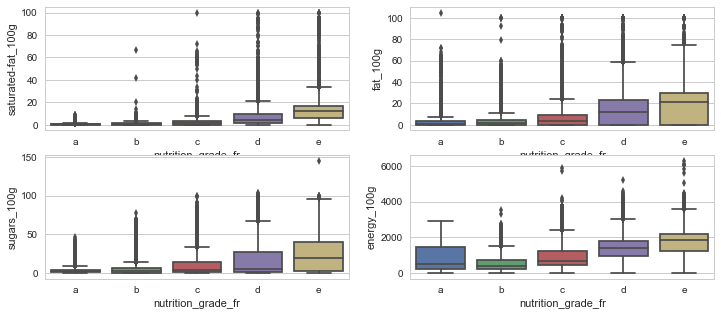

In [41]:
label_order = ['a','b','c','d','e']
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12,5))
sns.boxplot(x='nutrition_grade_fr', y='saturated-fat_100g', data=filtered_data, ax=axs[0][0], order = label_order)
sns.boxplot(x='nutrition_grade_fr', y='fat_100g', data=filtered_data, ax=axs[0][1], order = label_order)
sns.boxplot(x='nutrition_grade_fr', y='sugars_100g', data=filtered_data, ax=axs[1][0], order = label_order)
sns.boxplot(x='nutrition_grade_fr', y='energy_100g', data=filtered_data, ax=axs[1][1], order = label_order)
plt.show()

In [42]:
food_grade = filtered_data.pop('nutrition_grade_fr')

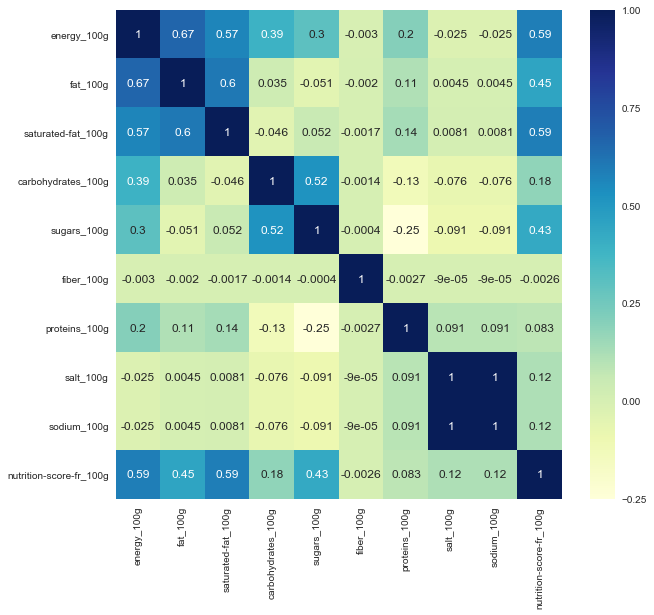

In [43]:
corr = filtered_data.corr()
plt.figure(figsize=(10,9))
sns.heatmap(corr, annot = True, cmap="YlGnBu")
plt.show()

In [44]:
filtered_data.drop('sodium_100g', 1, inplace = True)
filtered_data

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
185,215.0,0.0,0.0000,14.20,13.60,0.000,0.000,0.0616,18.0
189,1667.0,0.0,0.0000,93.30,93.30,0.000,0.000,0.0000,14.0
190,17.0,0.1,0.1000,0.10,0.10,0.000,0.100,0.0010,2.0
193,1632.0,7.0,4.5000,70.00,42.00,0.000,7.000,0.9750,21.0
194,1753.0,0.0,0.8000,0.00,87.70,0.900,0.600,0.0100,14.0
195,2406.0,0.0,2.9000,0.00,50.30,3.900,9.500,0.0030,14.0
231,177.0,0.0,0.0000,10.40,10.40,0.000,0.000,0.0254,13.0
232,1215.0,23.8,1.8000,18.50,17.00,0.000,1.300,1.7000,14.0
238,180.0,0.1,0.0001,10.70,10.70,0.000,0.000,0.0000,14.0
240,678.0,6.6,1.7000,17.00,3.70,0.900,8.200,0.7300,0.0


In [45]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_features = scale.fit_transform(filtered_data)

In [46]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_features, food_grade, test_size = 0.3, stratify = food_grade)

In [47]:
x_train.shape

(62331, 9)

In [48]:
x_test.shape

(26714, 9)

In [49]:
from sklearn.linear_model import LogisticRegression 
predict_grade_lr = LogisticRegression()
predict_grade_lr.fit(x_train, y_train)
score_lr = predict_grade_lr.score(x_test, y_test)
score_lr

0.78902448154525717

In [63]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap='YlGnBu')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


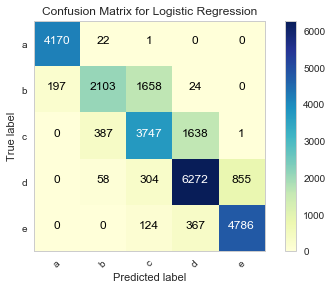

In [64]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, predict_grade_lr.predict(x_test))
plt.figure()
plt.grid('off')
labels = list(np.unique(y_train))
plot_confusion_matrix(cm_lr, classes=labels, title="Confusion Matrix for Logistic Regression")
plt.show()

In [59]:
from sklearn.neighbors import KNeighborsClassifier
error_list = []
for k in range(2,15):
    knn = KNeighborsClassifier(k) # training !
    error_list.append(100*(1-knn.fit(x_train, y_train).score(x_test,y_test))) # compute error on testing set
error_list

[4.9636894512240737,
 4.2524518978812598,
 4.6492475855356759,
 4.4396196750767336,
 4.5706371191135737,
 4.589353896833126,
 4.6455042299917597,
 4.5519203413940224,
 4.6717077187991336,
 4.7316014075016843,
 4.7727783184846935,
 4.7091412742382266,
 4.7840083851164223]

In [60]:
predict_grade_knn = KNeighborsClassifier(n_neighbors = 3)
predict_grade_knn.fit(x_train, y_train)
score_knn = predict_grade_knn.score(x_test, y_test)
score_knn

0.9574754810211874

Confusion matrix, without normalization


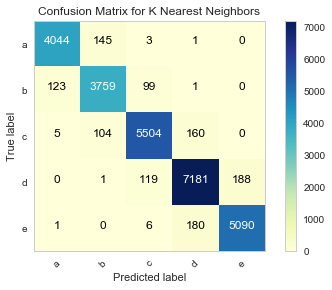

In [65]:
cm_knn = confusion_matrix(y_test, predict_grade_knn.predict(x_test))
plt.figure()
plt.grid('off')
plot_confusion_matrix(cm_knn, classes=labels, title="Confusion Matrix for K Nearest Neighbors")
plt.show()

In [66]:
from sklearn.ensemble import RandomForestClassifier
predict_grade_rf = RandomForestClassifier(n_estimators = 100)
predict_grade_rf.fit(x_train, y_train)
score_rf = predict_grade_rf.score(x_test, y_test)
score_rf

0.99689301489855509

Confusion matrix, without normalization


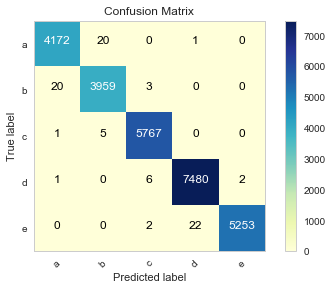

In [67]:
cm_rf = confusion_matrix(y_test, predict_grade_rf.predict(x_test))
plt.figure()
plt.grid('off')
plot_confusion_matrix(cm_rf, classes=labels, title="Confusion Matrix")
plt.show()